In [172]:
import sys
sys.path.insert(1, '/Users/adityagandotra/Documents/GitHub2/JunctionArray')
import JJArray as jja
import numpy as np
import qutip as qt
import matplotlib.pyplot as plt
from scipy.sparse import bmat
from tqdm.notebook import tqdm
import scqubits as scq
import seaborn as sns
import networkx as nx
import itertools

In [173]:
N = 3
Ncut = 7

EC = np.full((N), 0.5)
EJ = np.full((N), 0.001)
EJb = 10
ECb = 0.5
phi=0

H = jja.H_array(phi, N , Ncut, EJ, EC, EJb, ECb)

In [174]:
%time V = jja.ChargeToTranslation(N,Ncut)

Full Hilbert space dimension =  3375


  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/1135 [00:00<?, ?it/s]

Sector 0= 1135


  0%|          | 0/1135 [00:00<?, ?it/s]

Sector 1= 1120


  0%|          | 0/1135 [00:00<?, ?it/s]

Sector 2= 1120
Sum of sector dimensions =  3375
CPU times: user 62.8 ms, sys: 13 ms, total: 75.8 ms
Wall time: 70.3 ms


In [188]:
evals, evecs, symmetric_data = jja.SortedDiagonalization(H,V,4)

In [189]:
symmetric_data[2][0]

array([-6.02589027, -6.02490638, -3.3587531 , -3.35875291])

In [190]:
def getMatrixElement(op, level1, level2):
    ket = qt.Qobj(evecs[level2])
    bra1 = qt.Qobj(evecs[level1])
    bra = bra1.dag()
    return np.real(op.matrix_element(bra, ket))

In [191]:
theta1 = 0
theta2 = 2*np.pi/3
theta3 = 4*np.pi/3
theta = [0,2*np.pi/3,4*np.pi/3]

N3_graph = nx.MultiGraph()
#N3_graph.add_node(0,pos=(0,0))

for i in range(len(symmetric_data)):
    for j in range(len(symmetric_data[i][0])):
        r = abs((symmetric_data[i][0])[j] - evals[0])
        print(r)
        N3_graph.add_node((j+1)+3*i, pos=(r*np.cos(theta[i]),r*np.sin(theta[i])))



0.0
1.3323726918209884
1.3343393669601245
4.000000626987359
1.3328635514754694
1.3338474400799774
4.000000722326105
4.000000912899993
1.33286355147541
1.3338474400799782
4.000000722326118
4.000000912899967


In [183]:
#list(itertools.combinations(np.linspace(0, 10,11), 2))

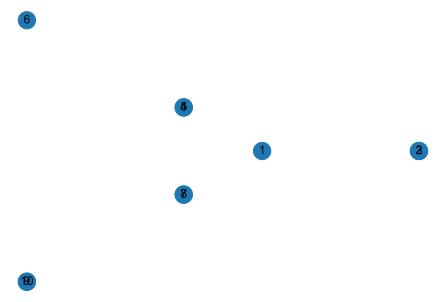

In [192]:
n1_op = jja.Charge_j(0,3,3)


pos=nx.get_node_attributes(N3_graph,'pos')
nx.draw(N3_graph, pos,with_labels = True)

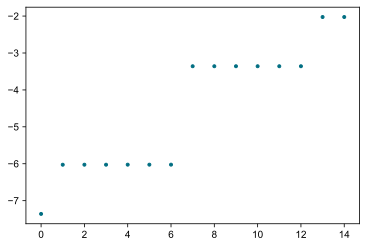

In [145]:
plt.plot(evals[0:21],'.')

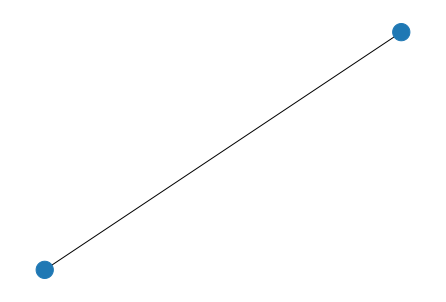

In [21]:
exG = nx.MultiGraph()
exG.add_node(0,pos=(0,0))
exG.add_node(1, pos=(0,0))
G=nx.Graph()

G.add_node(1,pos=(1,1))

G.add_node(2,pos=(2,3))

G.add_edge(1,2)

pos=nx.get_node_attributes(G,'pos')


nx.draw(G,pos)

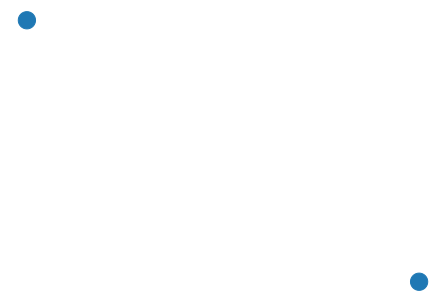

In [16]:
nx.draw(exG)